# 九章手写板 KNN 教程 

https://www.kaggle.com/c/digit-recognizer


In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
import matplotlib.pyplot as plt # 画图常用库

从 `../train.csv` and `../test.csv` 文件里面读入 numpy arrays.

导入数据后打印shape查看是否数据是否完整

导入数据差不多10秒

In [3]:

data_dir = "../"

# load csv files to numpy arrays
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
#     print(train.head())
#     print(train.shape)
#     print(train.head())
#     print(train[0:])
    X_train = train.values[0:train_row,1:] # 取下标为1-784的列（pixel0 - pixel783）
    y_train = train.values[0:train_row,0] # 取下标为0的列 (label)
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values  # 解释 value
#     print(Pred_test.shape)
#     print(pd.read_csv(data_dir + "test.csv").head())
    return X_train, y_train, Pred_test

train_row = 5000 # 如果想取全部数据，设置为最大值 42000
Origin_X_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)



(42000, 785)


In [4]:
print(Origin_X_train.shape, Origin_y_train.shape, Origin_y_test.shape)

(5000, 784) (5000,) (28000, 784)


用图像展示一下数据集是什么样子的

4


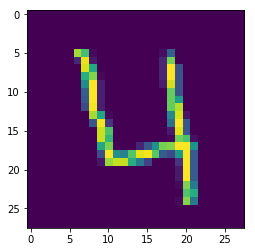

In [5]:
import matplotlib
import matplotlib.pyplot as plt
row = 3
# 展示第i个图
# print (X_train[row].reshape((28, 28)))

print (Origin_y_train[row])

plt.imshow(Origin_X_train[row].reshape((28, 28)))
plt.show()


展示部分数据看看图片是什么样子的。（有兴趣的同学可以自己看）

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


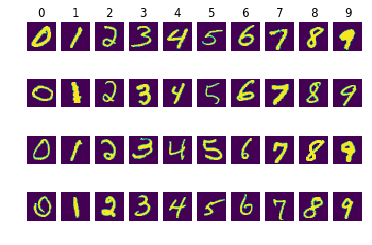

In [6]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

把原本的训练数据拆分成为20%测试集（8400个），80%训练集（33600个）

怎么样2/8分

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)
# 解释一下random 那个随机函数随机种子是什么。 随机种子一样，那么结果是一样的。

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)



下面进行KNN模型训练


In [8]:
from sklearn.metrics import accuracy_score


class knn():
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
        

    def predict(self, X, num, k=3):
        dataSet = X_train
        labels = y_train
      
        dataSetSize = dataSet.shape[0]
        diffMat = np.tile(X,(dataSetSize,1)) - dataSet
        sqDiffMat = diffMat**2
        sumDiffMat = sqDiffMat.sum(axis=1)
        distances = sumDiffMat**0.5
        sortedDistances = distances.argsort()
        classCount = {}
        
        for i in range(k):
            vote = labels[sortedDistances[i]]
            classCount[vote] = classCount.get(vote,0) + 1
        max = 0
        ans = 0
        for k,v in classCount.items():
            if(v>max):
                ans = k
                max = v
#         print("test #"+ str(num+1) + " prediction is " + str(ans)
        return(ans)


classifier = knn()
classifier.train(X_train, y_train)


# clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(trainX, trainY)
# predictions = clf.predict(validX)
# accuracy = accuracy_score(validY, predictions)
# print("the accuracy of kNN is : %f" % accuracy)

max = 0
ans_k = 0

for k in range(1, 4):
    print ('when k = ' + str(k) + ', start training')
    predictions = np.zeros(len(y_test))
    for i in range(X_test.shape[0]):
        if i % 500 == 0:
            print("Computing  " + str(i+1) + "/" + str(int(len(X_test))) + "...")
        output = classifier.predict(X_test[i], i, k)
        predictions[i] = output
    
#     print(k, predictions)
#     predictions.shape
    accuracy = accuracy_score(y_test, predictions)
    print ('k = '+ str(k) , ' accuracy =' + str(accuracy))
    if max < accuracy:
        ans_k = k
        max = accuracy
        
    

when k = 1, start training
Computing  1/1000...
Computing  501/1000...
k = 1  accuracy =0.919
when k = 2, start training
Computing  1/1000...
Computing  501/1000...
k = 2  accuracy =0.919
when k = 3, start training
Computing  1/1000...
Computing  501/1000...
k = 3  accuracy =0.925


In [9]:
print(y_test)
print(predictions)

[4 7 6 9 2 7 8 1 4 2 8 2 5 3 2 5 9 0 3 5 6 0 4 6 5 8 3 5 2 5 2 5 0 0 5 4 0
 7 1 2 9 9 3 2 7 4 0 0 4 8 5 0 1 6 5 8 5 9 4 3 9 0 4 0 1 7 5 0 1 3 5 2 8 1
 2 0 1 7 9 9 8 7 7 7 5 0 7 9 1 5 4 7 9 0 4 7 2 7 9 9 5 2 2 6 0 4 8 9 3 1 9
 4 0 6 8 9 6 4 0 2 9 9 2 6 7 1 8 5 5 8 7 8 2 7 9 8 6 9 2 7 4 3 1 4 9 5 8 4
 2 7 5 1 0 3 2 8 9 6 4 2 3 5 4 7 7 4 2 8 9 9 1 8 4 9 4 0 5 6 8 4 3 4 0 3 6
 2 4 1 5 0 6 6 4 0 8 4 5 4 7 2 7 2 3 6 0 4 2 3 0 9 9 1 7 2 1 4 5 1 9 8 2 6
 9 2 0 7 0 0 2 0 1 4 5 2 4 2 5 6 3 2 1 8 1 1 7 5 3 0 4 9 1 1 2 7 7 3 1 4 6
 2 8 6 7 1 5 6 9 0 1 3 4 7 1 7 2 6 8 9 7 8 1 1 4 9 5 6 4 4 2 8 7 7 4 8 3 4
 1 3 6 0 3 7 2 2 7 2 7 7 7 4 1 2 2 7 4 2 3 1 5 7 8 1 1 3 1 7 5 5 7 7 8 1 3
 4 3 1 3 2 6 2 5 0 9 0 3 6 9 5 0 1 4 0 5 5 2 2 7 1 7 2 2 6 9 4 1 7 1 7 0 3
 8 3 6 9 3 2 0 8 2 5 3 0 4 8 7 3 0 7 7 0 9 6 0 0 0 2 6 0 9 4 3 0 3 0 8 6 4
 2 1 4 9 4 0 4 4 3 9 0 6 5 5 3 5 9 5 3 5 9 9 9 6 3 9 3 2 9 9 6 1 4 7 7 9 7
 5 2 7 7 3 3 4 8 0 6 2 0 3 2 2 5 3 5 2 2 1 3 9 9 8 4 9 5 7 9 6 8 7 7 9 7 1
 9 6 5 5 5 2 1 7 8 8 6 5 

In [10]:
k = 3
predictions = np.zeros(Origin_y_test.shape[0])
for i in range(Origin_y_test.shape[0]):
    if i % 500 ==0:
        print("Computing  " + str(i+1) + "/" + str(int(len(Origin_y_test))) + "...")
    predictions[i] = classifier.predict(Origin_y_test[i], i, k)


Computing  1/28000...
Computing  501/28000...
Computing  1001/28000...
Computing  1501/28000...
Computing  2001/28000...
Computing  2501/28000...
Computing  3001/28000...
Computing  3501/28000...
Computing  4001/28000...
Computing  4501/28000...
Computing  5001/28000...
Computing  5501/28000...
Computing  6001/28000...
Computing  6501/28000...
Computing  7001/28000...
Computing  7501/28000...
Computing  8001/28000...
Computing  8501/28000...
Computing  9001/28000...
Computing  9501/28000...
Computing  10001/28000...
Computing  10501/28000...
Computing  11001/28000...
Computing  11501/28000...
Computing  12001/28000...
Computing  12501/28000...
Computing  13001/28000...
Computing  13501/28000...
Computing  14001/28000...
Computing  14501/28000...
Computing  15001/28000...
Computing  15501/28000...
Computing  16001/28000...
Computing  16501/28000...
Computing  17001/28000...
Computing  17501/28000...
Computing  18001/28000...
Computing  18501/28000...
Computing  19001/28000...
Computing 

In [ ]:
# 验证一下结果
print (predictions[200])
plt.imshow(Pred_test[200].reshape((28, 28)))

After predicting and saving results in Python array, we dump our predictions to a csv file
named `predictions.csv` which gets an accuracy of 97.114% on public leaderboard.

In [ ]:
print(len(predictions))
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()